# Installing and Downloading Dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12020, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 12020 (delta 13), reused 10 (delta 4), pack-reused 11984
Receiving objects: 100% (12020/12020), 12.56 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (8252/8252), done.


In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.5 kB/s 
     |████████████████████████████████| 8.8 MB 23.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.2.0+cu92 which 

In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.3 MB 12 kB/s 
     |████████████████████████████████| 19.1 MB 51.1 MB/s 
     |████████████████████████████████| 1.6 MB 49.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.2.0+cu92
    Uninstalling torch-1.2.0+cu92:
      Successfully uninstalled torch-1.2.0+cu92
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.4.0+cu92
    Uninstalling torchvision-0.4.0+cu92:
      Successfully uninstalled torchvision-0.4.0+cu92


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)

1.12.1+cu102


In [ ]:

from matplotlib import pyplot as plt
import numpy as np
import cv2

# Loading and Testing Default Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: torch>=1.7.0 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = 'https://ultralytics.com/images/zidane.jpg'
img2 = 'https://images.unsplash.com/photo-1574807626573-460d5155bc7a?crop=entropy&cs=tinysrgb&fm=jpg&ixlib=rb-1.2.1&q=80&raw_url=true&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1374'

In [ ]:
results1 = model(img)
results1.print()

results2 = model(img2)
results2.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 615.4ms pre-process, 12.7ms inference, 2.3ms NMS per image at shape (1, 3, 384, 640)
image 1/1: 2061x1374 12 cars, 5 traffic lights
Speed: 2236.5ms pre-process, 11.3ms inference, 1.3ms NMS per image at shape (1, 3, 640, 448)


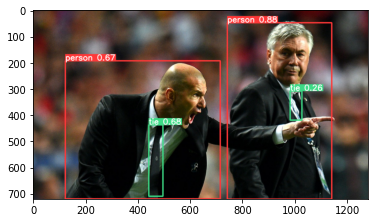

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results1.render()))
plt.show()

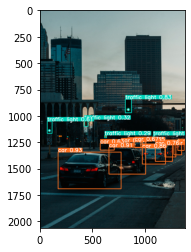

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))
plt.show()

# Importing Dataset

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 42.7 MB/s 
     |████████████████████████████████| 178 kB 67.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.4 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 138 kB 71.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=1de52d5840f42eddead218a270eceda383ee4f4c8ef7bea7592ebeef956c2cd3
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e9a626ce0586c009150a84c9962d1b653c1e221a7c153be7188872854fb06b6a
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="P5mTg3R8mWRykLwT4jFx")
project = rf.workspace("myworkspace-tjf6c").project("face-cover-accessories-detector-2")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Face-Cover-Accessories-Detector-2-1 in yolov5pytorch:: 100%|██████████| 2302/2302 [00:01<00:00, 1789.28it/s]


#  Training model on custom dataset

In [ ]:
!python yolov5/train.py --img 416 --batch 64 --epochs 300 --data yolov5/dataset.yml --weights yolov5/yolov5m.pt 

train: weights=yolov5/yolov5m.pt, cfg=, data=yolov5/dataset.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      glenn-jocher-patch-1 -> origin/glenn-jocher-patch-1
github: up to date with https://github.co

# Loading and Testing Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-26 Python-3.7.13 torch-1.12.1+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 290 layers, 20865057 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [ ]:
helmet_image = 'https://images.unsplash.com/photo-1579344207386-754b6657cb43?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NTZ8fGhlbG1ldHxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=400&q=60'
mask_image = 'https://images.unsplash.com/photo-1584309832315-39d404eecc77?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTd8fG1hc2t8ZW58MHx8MHx8&auto=format&fit=crop&w=400&q=60'
dark_glasses_image  = 'https://images.unsplash.com/photo-1531167914734-a3bc82ef2015?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTExfHxkYXJrJTIwZ2xhc3Nlc3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=400&q=60'
hat_image = 'https://images.unsplash.com/photo-1531891570158-e71b35a485bc?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTR8fGNhcHxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=400&q=60'

In [ ]:
results1 = model(helmet_image)
results1.print()

image 1/1: 600x400 1 helmet
Speed: 150.0ms pre-process, 25.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 448)


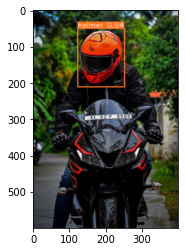

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results1.render()))
plt.show()

In [ ]:
results2 = model(mask_image)
results2.print()

image 1/1: 267x400 1 mask
Speed: 41.3ms pre-process, 25.5ms inference, 1.9ms NMS per image at shape (1, 3, 448, 640)


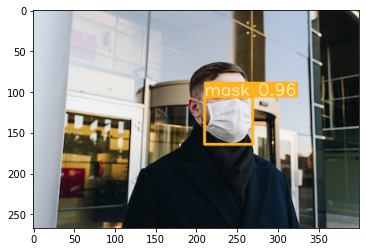

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results2.render()))
plt.show()

In [ ]:
results3 = model(dark_glasses_image)
results3.print()

image 1/1: 600x400 1 dark-glasses
Speed: 49.6ms pre-process, 24.8ms inference, 1.3ms NMS per image at shape (1, 3, 640, 448)


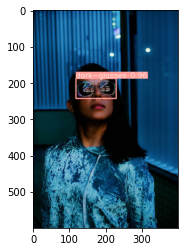

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results3.render()))
plt.show()

In [ ]:
results4 = model(hat_image)
results4.print()

image 1/1: 500x400 1 cap
Speed: 64.2ms pre-process, 25.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 512)


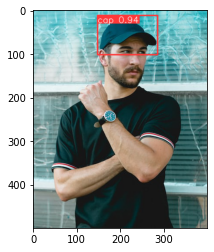

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results4.render()))
plt.show()

# Another Test

In [ ]:
import os

test_images = os.listdir('Face-Cover-Accessories-Detector-2-1/test/images/')
base_path = 'Face-Cover-Accessories-Detector-2-1/test/'
for img in test_images:
  test_results = model(img)
  test_results.print()

  %matplotlib inline
  plt.imshow(np.squeeze(test_results.render()))
  plt.show()

In [ ]:
test_results = model('https://images.unsplash.com/photo-1587314199858-905a5e5b618f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8bWFza3xlbnwwfHwwfHw%3D&auto=format&fit=crop&w=400&q=60')
test_results.print()

image 1/1: 267x400 1 mask
Speed: 212.6ms pre-process, 25.5ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


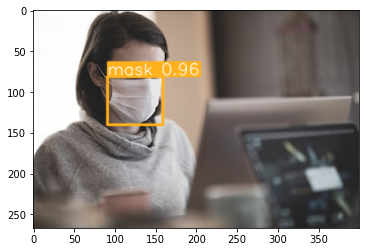

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_results.render()))
plt.show()

In [ ]:
test_results = model('https://images.unsplash.com/photo-1596455607563-ad6193f76b17?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8Y2FwfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=400&q=60')
test_results.print()

image 1/1: 600x400 1 cap
Speed: 1034.1ms pre-process, 24.8ms inference, 1.4ms NMS per image at shape (1, 3, 640, 448)


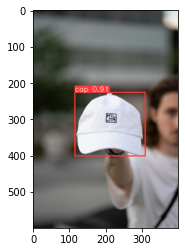

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_results.render()))
plt.show()

In [ ]:
test_results = model('https://images.unsplash.com/photo-1608634580399-7cd5416fcd11?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8YmFzZWJhbGwlMjBjYXB8ZW58MHx8MHx8&auto=format&fit=crop&w=400&q=60')
test_results.print()

image 1/1: 500x400 1 cap
Speed: 625.8ms pre-process, 26.0ms inference, 1.4ms NMS per image at shape (1, 3, 640, 512)


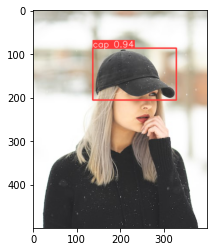

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_results.render()))
plt.show()

In [ ]:
test_results = model('https://images.unsplash.com/photo-1586622977567-bc45e4ae72fe?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8YmFzZWJhbGwlMjBjYXB8ZW58MHx8MHx8&auto=format&fit=crop&w=400&q=60')
test_results.print()

image 1/1: 500x400 1 cap
Speed: 638.1ms pre-process, 26.0ms inference, 1.7ms NMS per image at shape (1, 3, 640, 512)


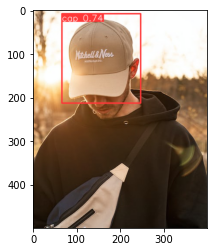

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_results.render()))
plt.show()

In [ ]:
test_results = model('https://images.unsplash.com/photo-1614501466332-cb87859bf36e?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTJ8fGJhc2ViYWxsJTIwY2FwfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=400&q=60')
test_results.print()

image 1/1: 561x400 1 cap
Speed: 778.3ms pre-process, 25.7ms inference, 1.3ms NMS per image at shape (1, 3, 640, 480)


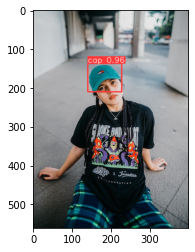

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(test_results.render()))
plt.show()